In [80]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')


In [2]:
df = pd.read_csv("New_York_City_Leading_Causes_of_Death.csv")

In [3]:
df

,Year,Ethnicity,Sex,Cause of Death,Count,Percent
0,2010,NON-HISPANIC BLACK,MALE,HUMAN IMMUNODEFICIENCY VIRUS DISEASE,297,5
1,2010,NON-HISPANIC BLACK,MALE,INFLUENZA AND PNEUMONIA,201,3
2,2010,NON-HISPANIC BLACK,MALE,INTENTIONAL SELF-HARM (SUICIDE),64,1
3,2010,NON-HISPANIC BLACK,MALE,MALIGNANT NEOPLASMS,1540,23
4,2010,NON-HISPANIC BLACK,MALE,MENTAL DISORDERS DUE TO USE OF ALCOHOL,50,1
5,2010,NON-HISPANIC BLACK,MALE,"NEPHRITIS, NEPHROTIC SYNDROME AND NEPHROSIS",70,1
6,2010,NON-HISPANIC BLACK,MALE,PEPTIC ULCER,13,0
7,2010,NON-HISPANIC BLACK,MALE,PSYCH. SUBSTANCE USE & ACCIDENTAL DRUG POISONING,111,2
8,2010,NON-HISPANIC BLACK,MALE,SEPTICEMIA,36,1
9,2010,NON-HISPANIC BLACK,MALE,SHORT GESTATION/LBW,35,1


In [4]:
df.columns

Index(['Year', 'Ethnicity', 'Sex', 'Cause of Death', 'Count', 'Percent'], dtype='object')

### 0. How is this data distributed? 
The presence of extrame values is a common pattern in this dataframe. We need to be carefull while using cetered measures.

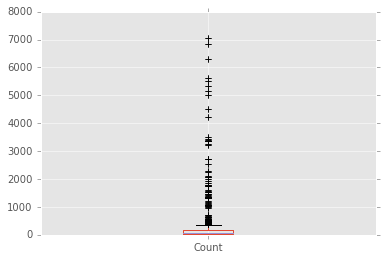

In [5]:
df['Count'].plot.box()

### 1. In what year new yorkers died the most?
2007 was the year that more cases of death were reported. However, not a single year was very far away from the mean.

In [6]:
df.groupby('Year')['Count'].sum().sort_values(ascending=False)


Year
2007    196508
2008    195500
2009    190772
2010    186092
2011    184276
Name: Count, dtype: int64

In [7]:
df.groupby('Year')['Count'].sum().mean()

190629.60000000001

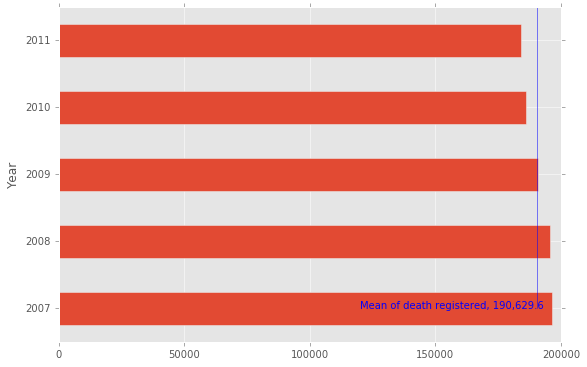

In [8]:
fig, ax = plt.subplots(figsize=(9, 6))
df.groupby('Year')['Count'].sum().plot.barh()
mean = df.groupby('Year')['Count'].sum().mean()
ax.plot([mean, mean], [0, 12], c='blue', linestyle="-", linewidth=0.5)
ax.annotate(s="Mean of death registered, 190,629.6", xy=(120000,0), color='Blue')

### 2. Who is more likely to die, a male newyorker or a female new yorker? 
Surprisingly, women are most likely to die than men in NYC.

In [9]:
df.groupby('Sex')['Count'].sum()

Sex
FEMALE    484024
MALE      469124
Name: Count, dtype: int64

### 3. Is Sex (in)difference in the data the same for all the years available?
Diference is not very significants, but in all years mortality was more frequent in women in NYC.

In [10]:
df.groupby(['Year', 'Sex'])['Count'].sum()


Year  Sex   
2007  FEMALE    100528
      MALE       95980
2008  FEMALE    100040
      MALE       95460
2009  FEMALE     96716
      MALE       94056
2010  FEMALE     93392
      MALE       92700
2011  FEMALE     93348
      MALE       90928
Name: Count, dtype: int64

(0, 110000)

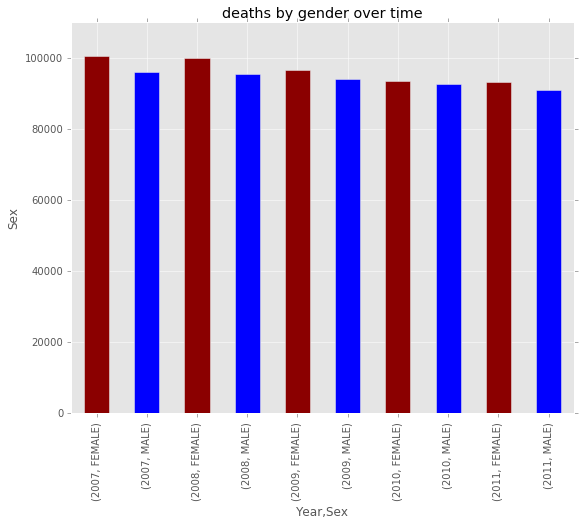

In [11]:
fig, ax = plt.subplots(figsize=(9, 7))
df.groupby(['Year', 'Sex'])['Count'].sum().plot(color=['darkred', 'blue'],kind='bar', title="deaths by gender over time")
ax.set_ylabel('total deaths')
ax.set_ylabel('Sex')
ax.set_ylim((0,110000))

### 4. Which one are the most common deseases for men and woman? Is there a difference?

Mayor causes of death like heart deseases or Cancer seems to behave similar in the top 3 for men and women. 

In [12]:
df.groupby(['Cause of Death', 'Sex'])['Count'].sum().sort_values(ascending=False).head(6)

Cause of Death           Sex   
DISEASES OF HEART        FEMALE    208248
                         MALE      177052
MALIGNANT NEOPLASMS      FEMALE    133096
                         MALE      129292
INFLUENZA AND PNEUMONIA  FEMALE     24820
                         MALE       21696
Name: Count, dtype: int64

### 5. What about in other deseases? Are there any sex differences?

Crebrovascular, diabetes and cronic lower respiratory deseases are more comen in women than men. On the other hand, Diabetes, HIV and deaths by accidents (note related to drugs) are most common in men.  

In [13]:
df.groupby(['Cause of Death', 'Sex'])['Count'].sum().sort_values(ascending=False)

Cause of Death                                    Sex   
DISEASES OF HEART                                 FEMALE    208248
                                                  MALE      177052
MALIGNANT NEOPLASMS                               FEMALE    133096
                                                  MALE      129292
INFLUENZA AND PNEUMONIA                           FEMALE     24820
                                                  MALE       21696
CEREBROVASCULAR DISEASE                           FEMALE     18080
DIABETES MELLITUS                                 FEMALE     17592
CHRONIC LOWER RESPIRATORY DISEASES                FEMALE     17260
DIABETES MELLITUS                                 MALE       15428
CHRONIC LOWER RESPIRATORY DISEASES                MALE       14584
CEREBROVASCULAR DISEASE                           MALE       13012
ACCIDENTS EXCEPT DRUG POISONING                   MALE       12856
HUMAN IMMUNODEFICIENCY VIRUS DISEASE              MALE       12224
PSYCH

### 6. What is the leading cause of death?
NYC has a real heart problem

In [14]:
#Disease of heart is the number 1
df.groupby('Cause of Death')['Count'].sum().sort_values(ascending=False).head(1)

Cause of Death
DISEASES OF HEART    385300
Name: Count, dtype: int64

### 7. What other deseases are frequent in newyorkers?
Top 10 deseases that causes death in NYC

In [15]:
df.groupby('Cause of Death')['Count'].sum().sort_values(ascending=False).head(10)

Cause of Death
DISEASES OF HEART                                   385300
MALIGNANT NEOPLASMS                                 262388
INFLUENZA AND PNEUMONIA                              46516
DIABETES MELLITUS                                    33020
CHRONIC LOWER RESPIRATORY DISEASES                   31844
CEREBROVASCULAR DISEASE                              31092
ACCIDENTS EXCEPT DRUG POISONING                      19760
HUMAN IMMUNODEFICIENCY VIRUS DISEASE                 18528
ESSENTIAL HYPERTENSION AND RENAL DISEASES            18308
PSYCH. SUBSTANCE USE & ACCIDENTAL DRUG POISONING     14524
Name: Count, dtype: int64

#### Hearth Deseases and Cancer  are by far the most common causes of death!

(0, 400000)

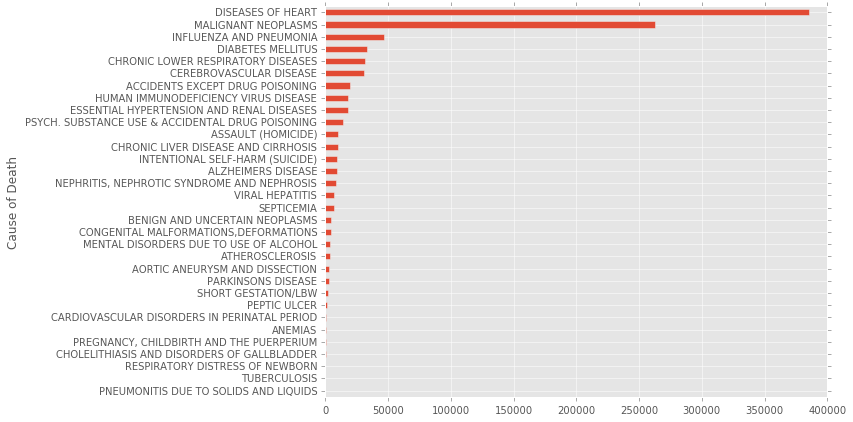

In [16]:
fig, ax = plt.subplots(figsize=(9, 7))
df.groupby('Cause of Death')['Count'].sum().sort_values(ascending=True).plot.barh()
ax.set_xlim((0,400000))

###  8. Which ethnicity is overall more vulnerable to deseases in NYC? 

According to the number of cases reported, non-hispanic white newyorkers have the highest mortality rate.

In [17]:
df.groupby('Ethnicity')['Count'].sum().sort_values(ascending=False)

Ethnicity
NON-HISPANIC WHITE          483900
NON-HISPANIC BLACK          249908
HISPANIC                    164048
ASIAN & PACIFIC ISLANDER     55292
Name: Count, dtype: int64

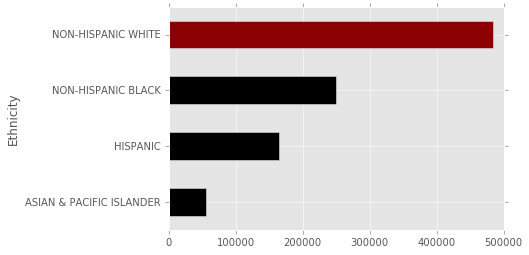

In [18]:
df.groupby('Ethnicity')['Count'].sum().plot.barh(color=['Black', 'Black', 'Black', 'darkred'])

### 9. Is distribution between ethnicities the same? What about white newyorkers?

Data on white population seems to be very similar to the overall outcome.

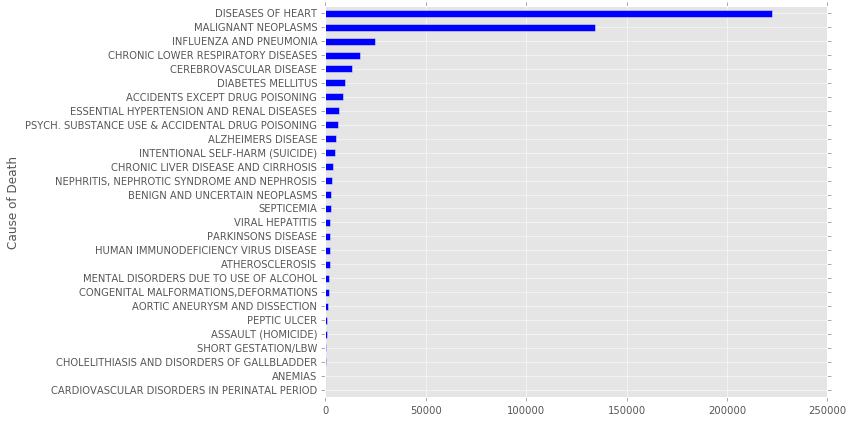

In [31]:
fig, ax = plt.subplots(figsize=(9, 7))
only_whites = df[df['Ethnicity'] == 'NON-HISPANIC WHITE']
only_whites.groupby('Cause of Death')['Count'].sum().sort_values(ascending=True).plot.barh(color='blue')


### 10. Same for african americans?

Same distribution with the exception of an increase in deaths produced by diabetes type 2 and HIV

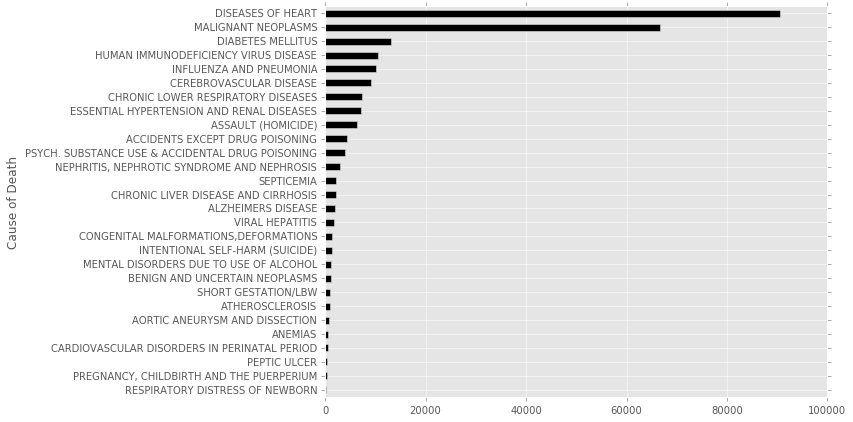

In [20]:
fig, ax = plt.subplots(figsize=(9, 7))
only_blacks = df[df['Ethnicity'] == 'NON-HISPANIC BLACK']
only_blacks.groupby('Cause of Death')['Count'].sum().sort_values(ascending=True).plot.barh(color='black')

### 11. What about spanish and asians?

Similar results for spanish population 

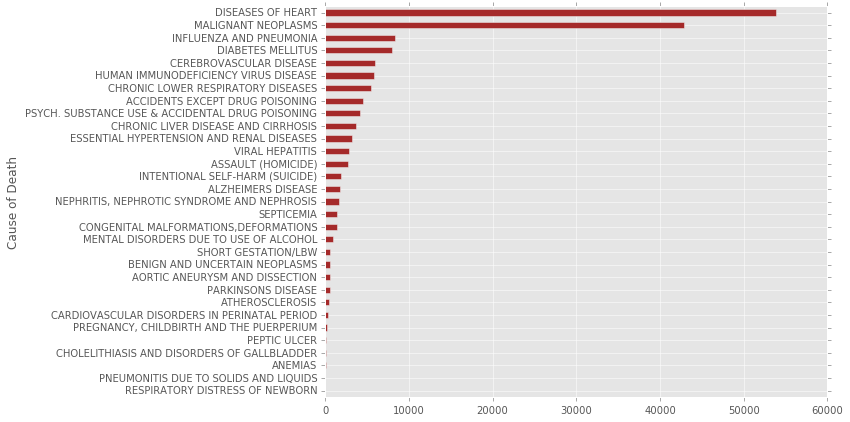

In [21]:
fig, ax = plt.subplots(figsize=(9, 7))
only_hispanic = df[df['Ethnicity'] == 'HISPANIC']
only_hispanic.groupby('Cause of Death')['Count'].sum().sort_values(ascending=True).plot.barh(color='brown')

#### Asians are by far the most different population in relations to causes of death. It has the highest incidents of death by Cancer

In [22]:
only_asians = df[df['Ethnicity'] == 'ASIAN & PACIFIC ISLANDER']

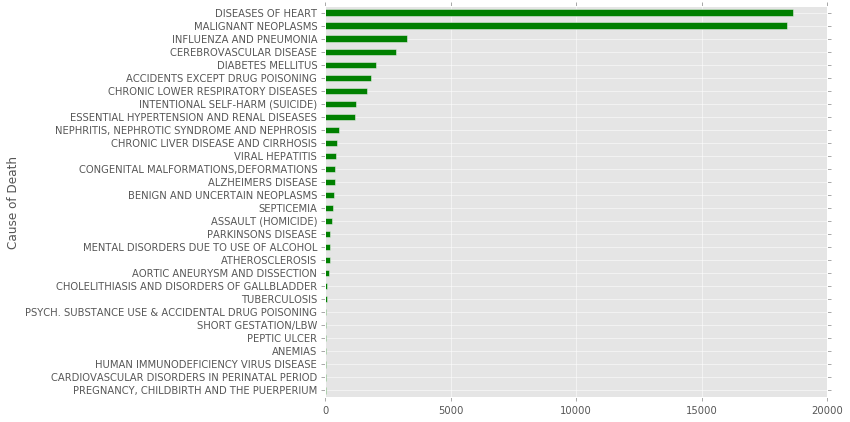

In [39]:
fig, ax = plt.subplots(figsize=(9, 7))
only_asians.groupby('Cause of Death')['Count'].sum().sort_values(ascending=True).plot.barh(color='green')

In [106]:
df['Year'].value_counts()

2011    784
2007    772
2010    772
2008    760
2009    752
Name: Year, dtype: int64

In [107]:
df1 = df[df['Year'] == 2011]
df2 = df[df['Year'] == 2010]
df3 = df[df['Year'] == 2009]
df4 = df[df['Year'] == 2008]
df5 = df[df['Year'] == 2007]

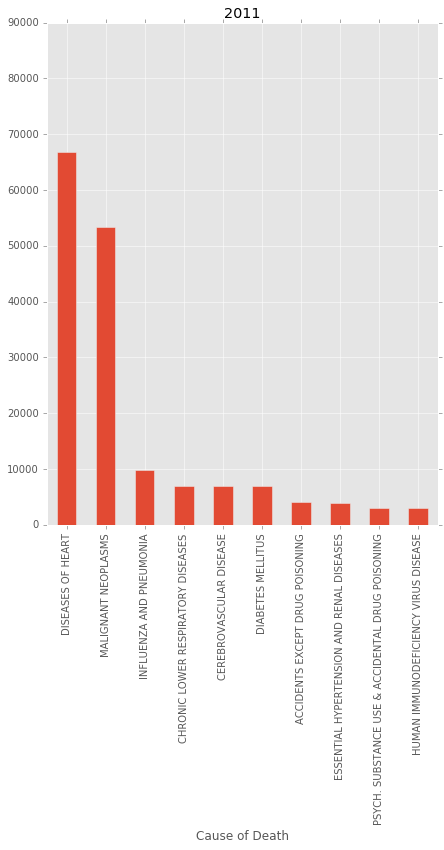

In [128]:
fig, ax = plt.subplots(figsize=(7, 9))
df1.groupby('Cause of Death')['Count'].sum().sort_values(ascending=False).head(10).plot.bar()
ax.set_title("2011")
ax.set_ylim((0,90000))
plt.savefig("heart1.pdf")

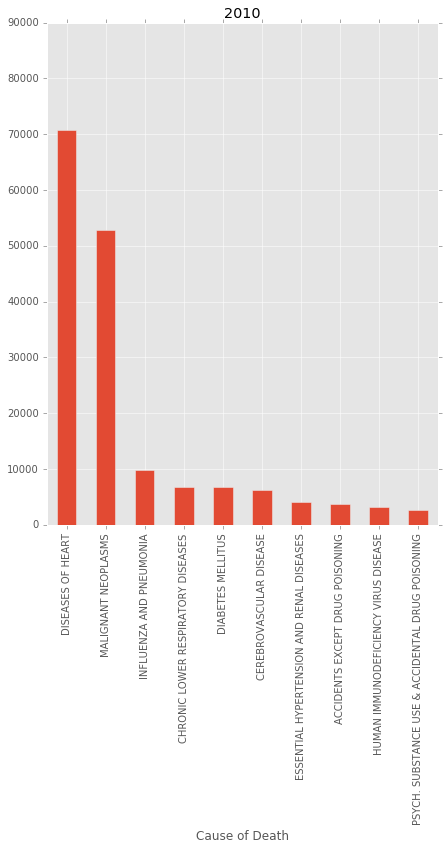

In [135]:
fig, ax = plt.subplots(figsize=(7, 9))
df2.groupby('Cause of Death')['Count'].sum().sort_values(ascending=False).head(10).plot.bar()
ax.set_title("2010")
ax.set_ylim((0,90000))
plt.savefig("heart2.pdf")

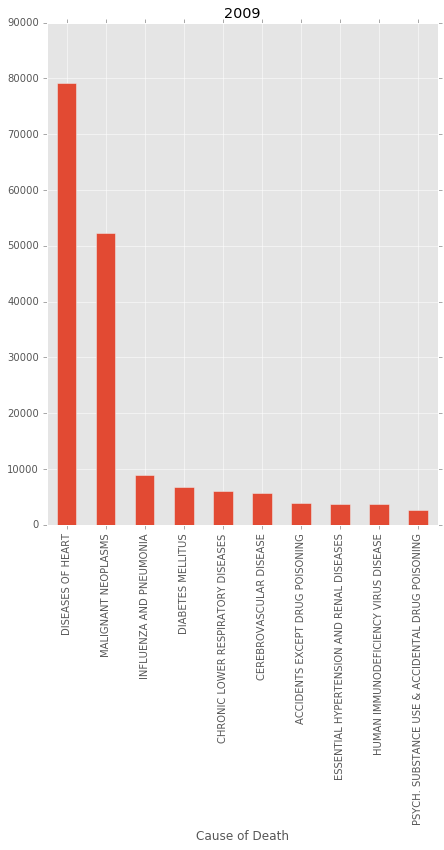

In [134]:
fig, ax = plt.subplots(figsize=(7, 9))
df3.groupby('Cause of Death')['Count'].sum().sort_values(ascending=False).head(10).plot.bar()
ax.set_title("2009")
ax.set_ylim((0,90000))
plt.savefig("heart3.pdf")

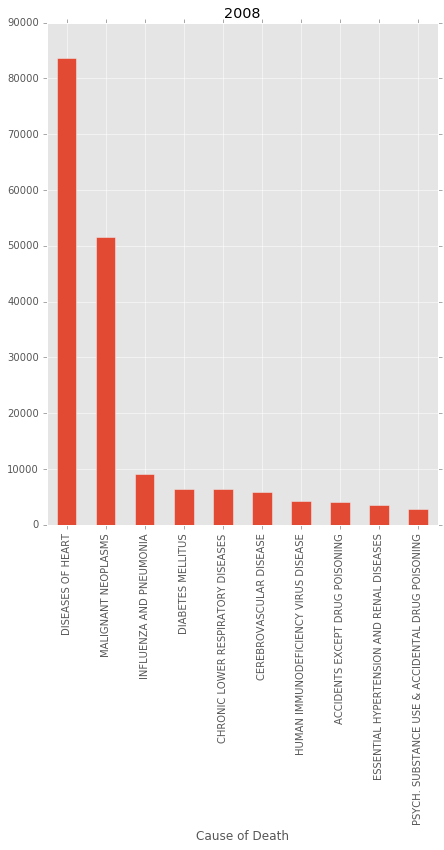

In [133]:
fig, ax = plt.subplots(figsize=(7, 9))
df4.groupby('Cause of Death')['Count'].sum().sort_values(ascending=False).head(10).plot.bar()
ax.set_title("2008")
ax.set_ylim((0,90000))
plt.savefig("heart4.pdf")